# Hierarchical Clustering on Vehicle Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The Data

In [3]:
df = pd.read_csv('cluster_mpg.csv')

In [4]:
df = df.dropna()

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [7]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [8]:
df_dummies = pd.get_dummies(df.drop('name', axis=1))

In [9]:
df_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scale = MinMaxScaler()

In [12]:
data_scaled = scale.fit_transform(df_dummies)

In [13]:
data_scaled

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [14]:
df_scaled = pd.DataFrame(data_scaled, columns=df_dummies.columns)

<Axes: >

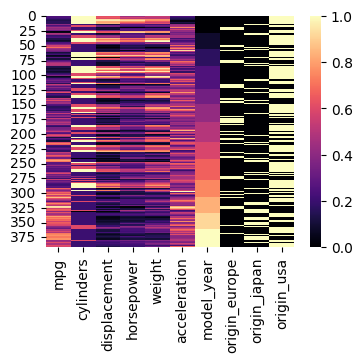

In [15]:
plt.figure(figsize=(4,3), dpi=100)
sns.heatmap(df_scaled, cmap='magma')

#### What features are related (similar) to each other?

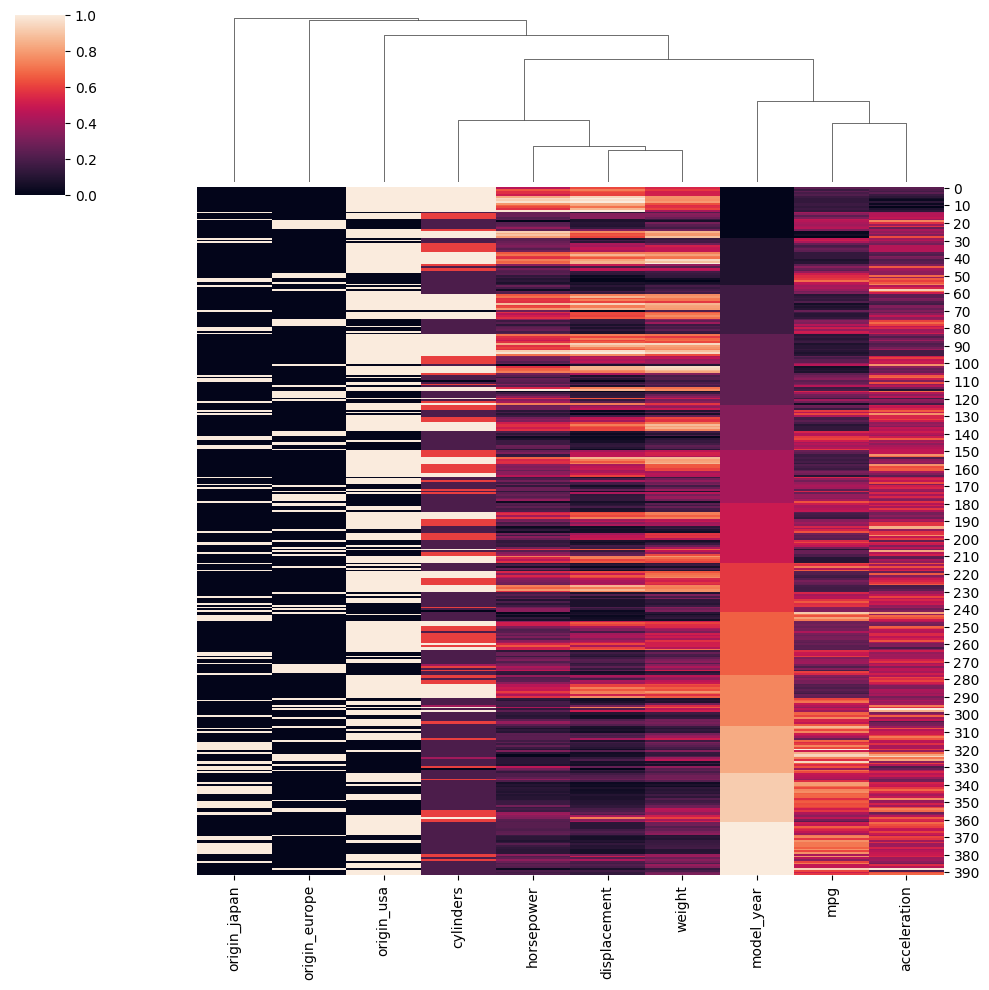

In [16]:
sns.clustermap(df_scaled, row_cluster=False)

#### Dummy features (origin: USA, Europe, and Japan) always have the least correlation. So, they can be removed before making cluster maps.

#### What rows (cars) are related (similar) to each other?

**The main purpose of clustering we want to do here is to cluster similar cars.**

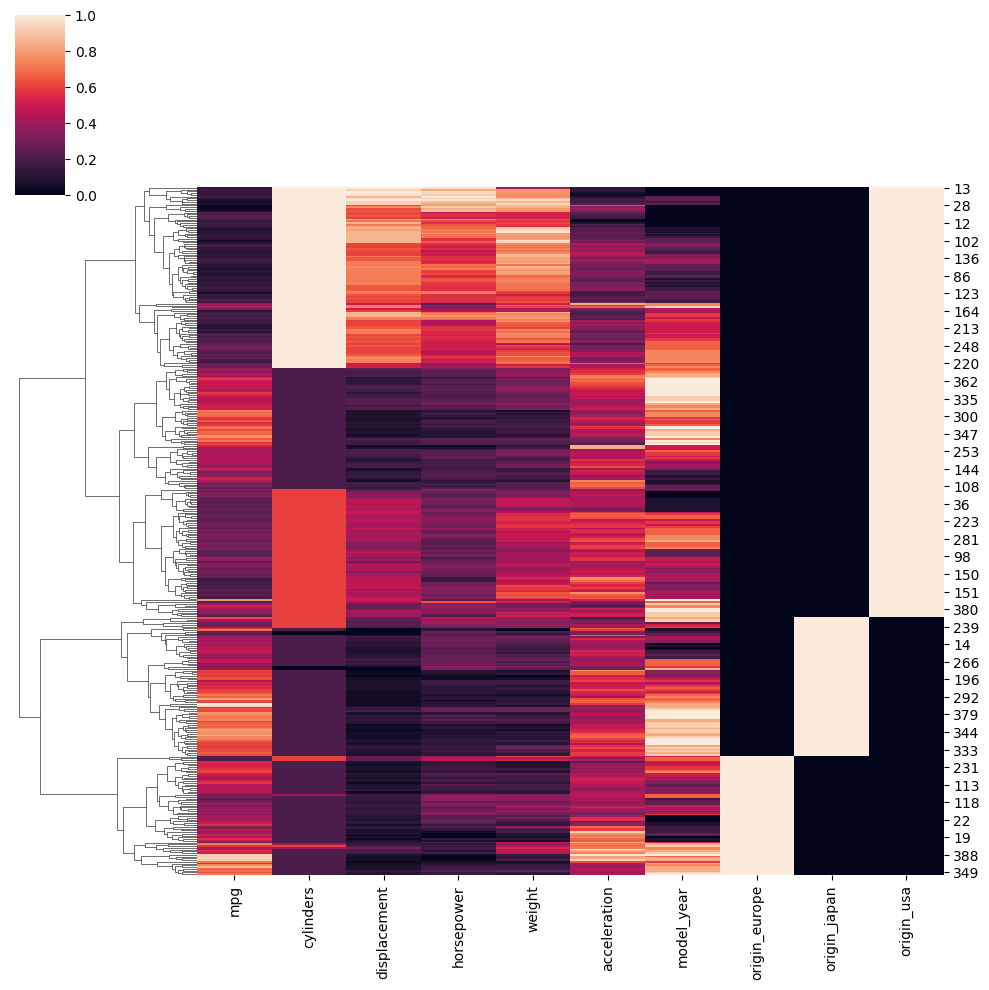

In [17]:
sns.clustermap(df_scaled, col_cluster=False)

#### Rows (cars) correlate perfectly by their origins (USA, Europe, Japan).
#### Cylinders, displacement, and horsepower are also correlated to a lesser degree. 

## Using Scikit-Learn

**We can use a dendrogram and distance threshold to have the Scikit-Learn Algorithm choose the best number of Clusters.**

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
model = AgglomerativeClustering(n_clusters=4)

In [20]:
labels = model.fit_predict(data_scaled)

In [21]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

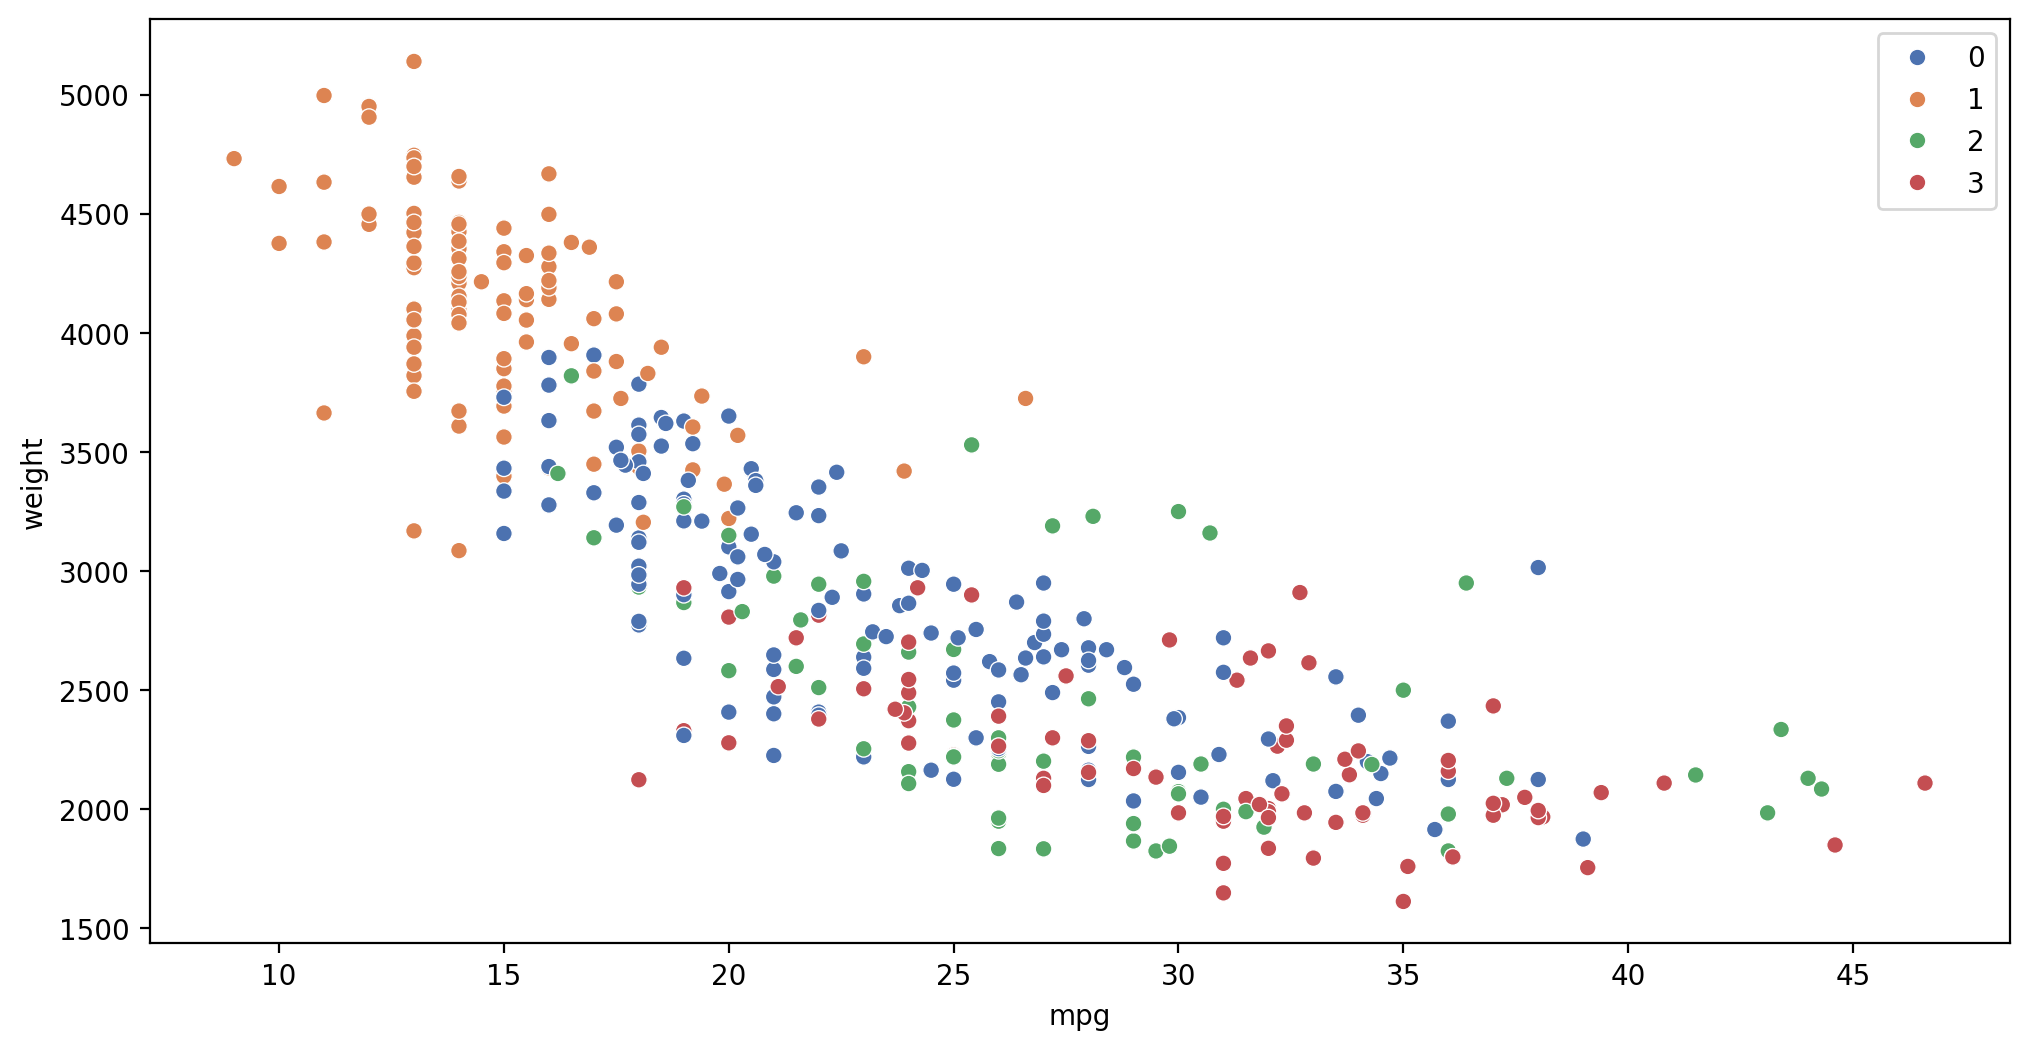

In [29]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue=labels, palette='deep');

## Exploring the Number of Clusters with Dendrograms

the documentation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

#### Assuming every point starts as its own cluster

#### affinity hyperparameter: 
**The distance metrics used to compute the linkage of a point (sample) and clusters (default: Euclidean).**


**Euclidean distance works best because we scaled our data based on MinMaxScaler**

        What is the maximum distance possible for each sample (row)?
        
        sqrt(n_feature)
        
        e.g. We have 10 features =>> sqrt(10 * 1)
                                     3.16

    distance_threshold : float, default=None
    
        The linkage distance threshold at or above which clusters will not be
        merged. 
        
        If not ``None``, ``n_clusters`` must be ``None`` and
        ``compute_full_tree`` must be ``True``.


#### e.g. If distance_threshold = 0 =>> no sample will merge.

In [30]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [31]:
labels = model.fit_predict(data_scaled)

In [33]:
labels     # each row is a cluster

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

# Linkage Model



In [36]:
from scipy.cluster.hierarchy import dendrogram   # the visualization function (given the linkage matrix)
from scipy.cluster import hierarchy

In [37]:
linkage_matrix = hierarchy.linkage(model.children_)

In [38]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

    [cluster_i    cluster_j     distance(i, j)     number of samples 
                                                  within this distance] 
                                                  In [2, N-1]

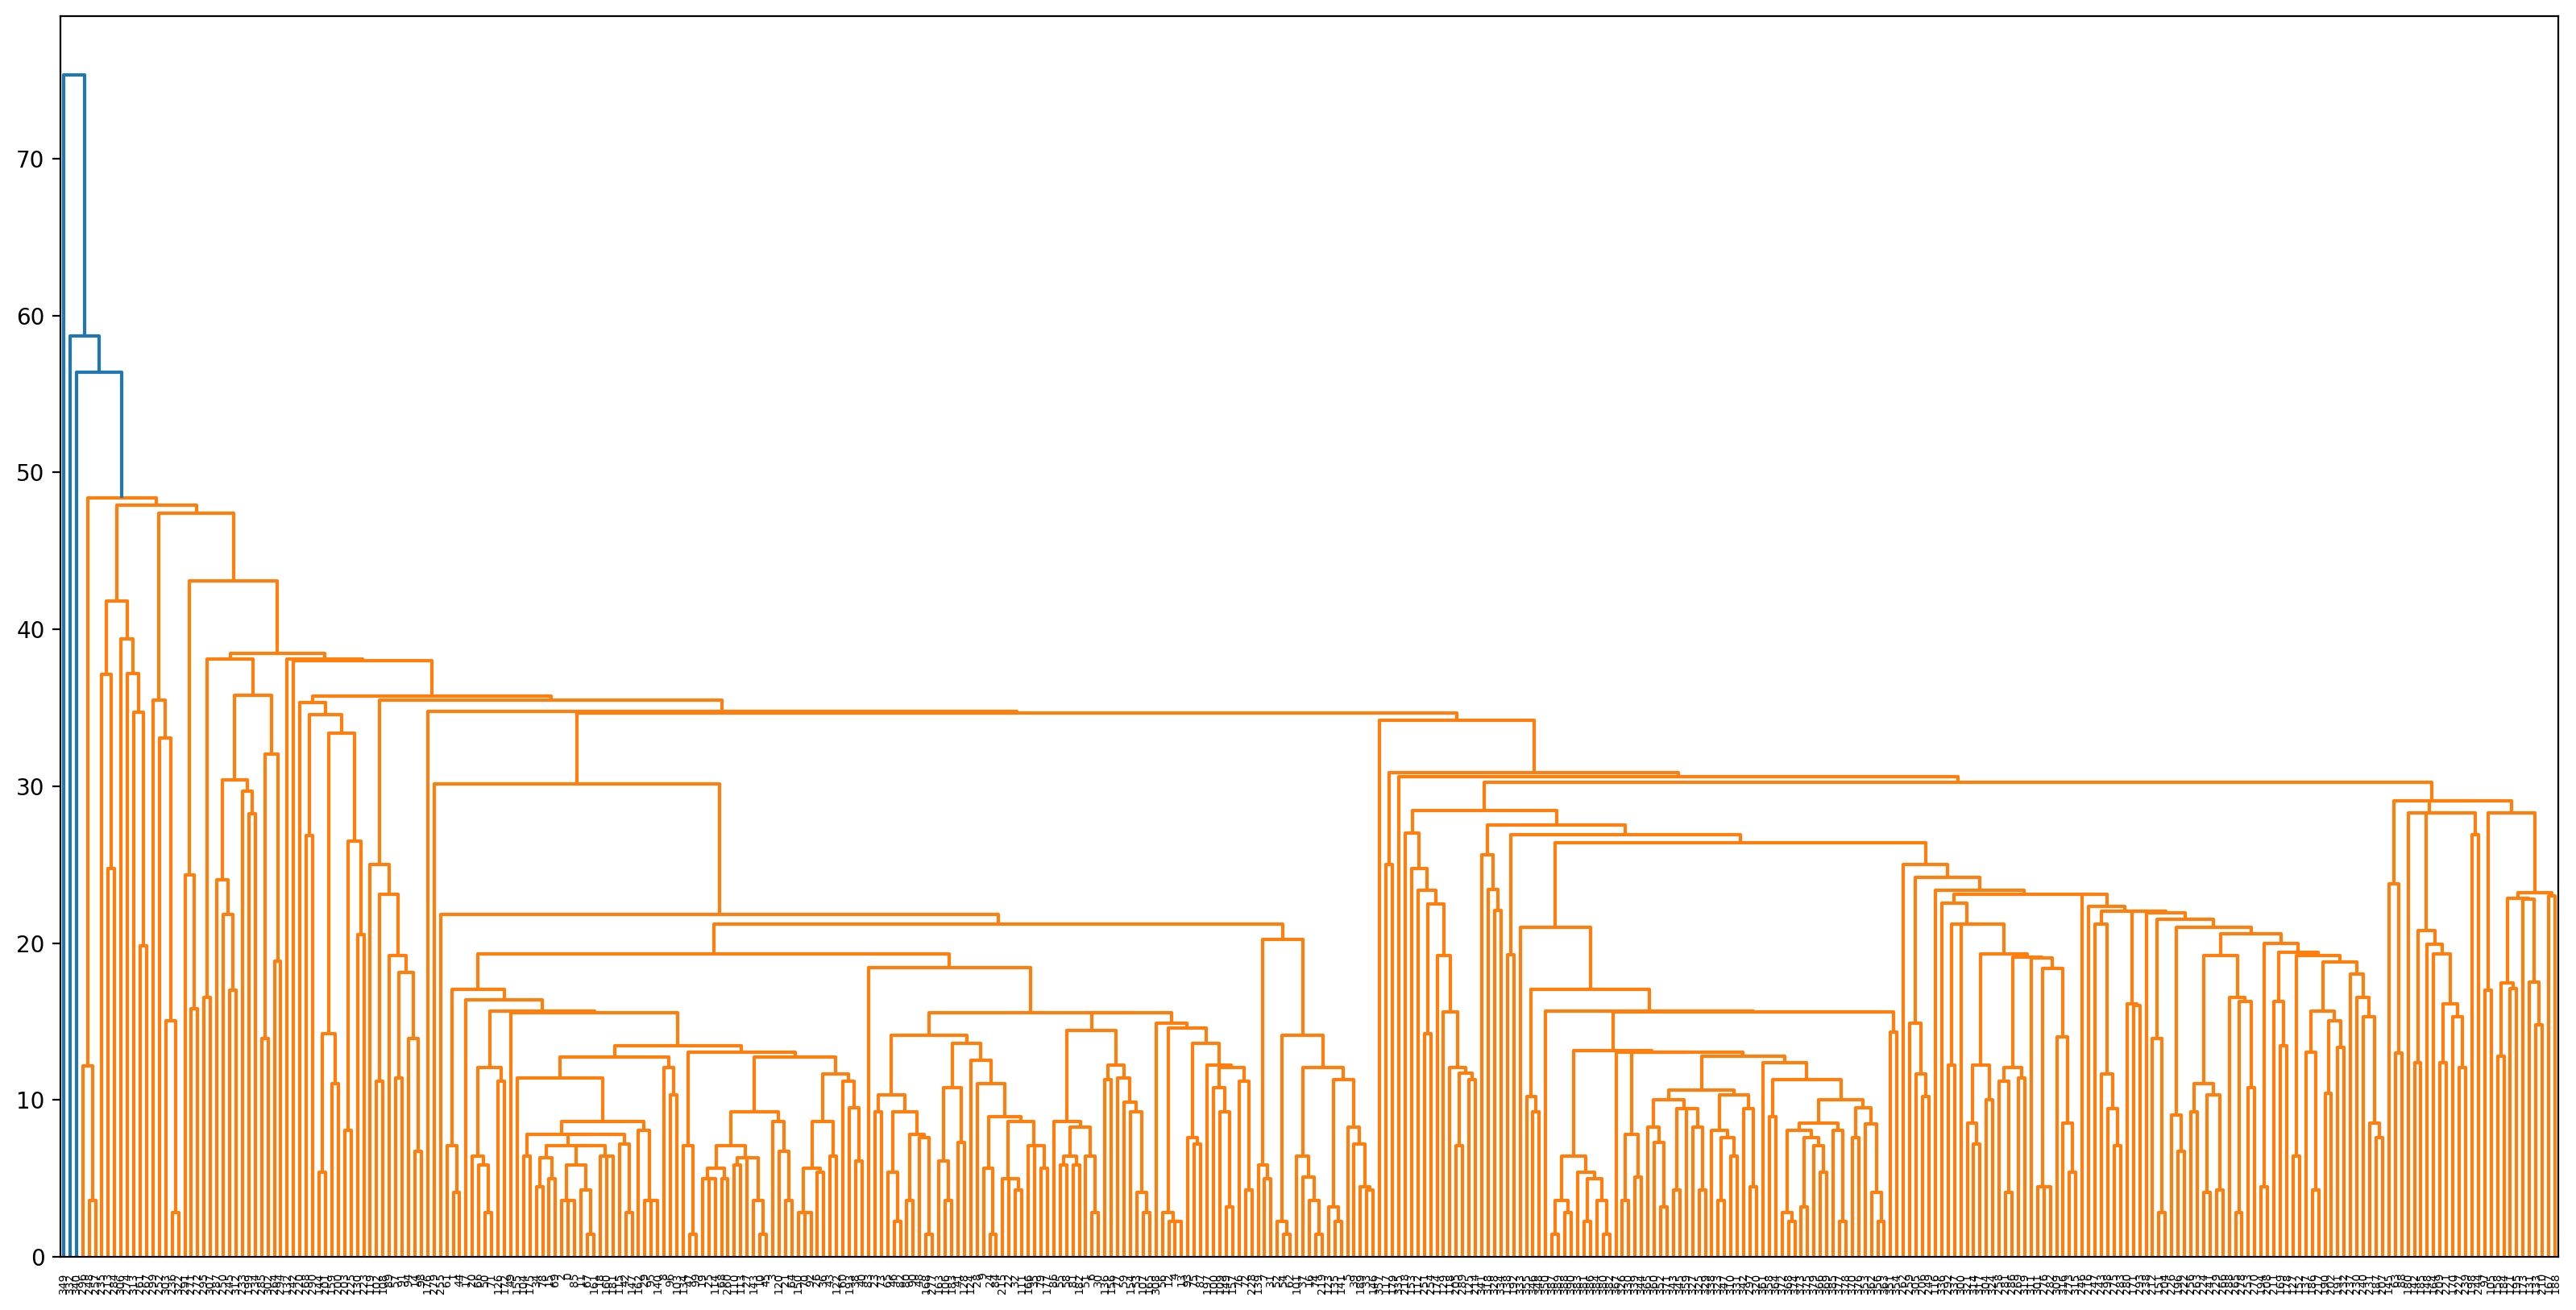

In [39]:
plt.figure(figsize=(20,10), dpi=200)

dendro = dendrogram(linkage_matrix)

#### to make it less complex => Truncation Mode is used.
#### truncate_mode = 'lastp' => 

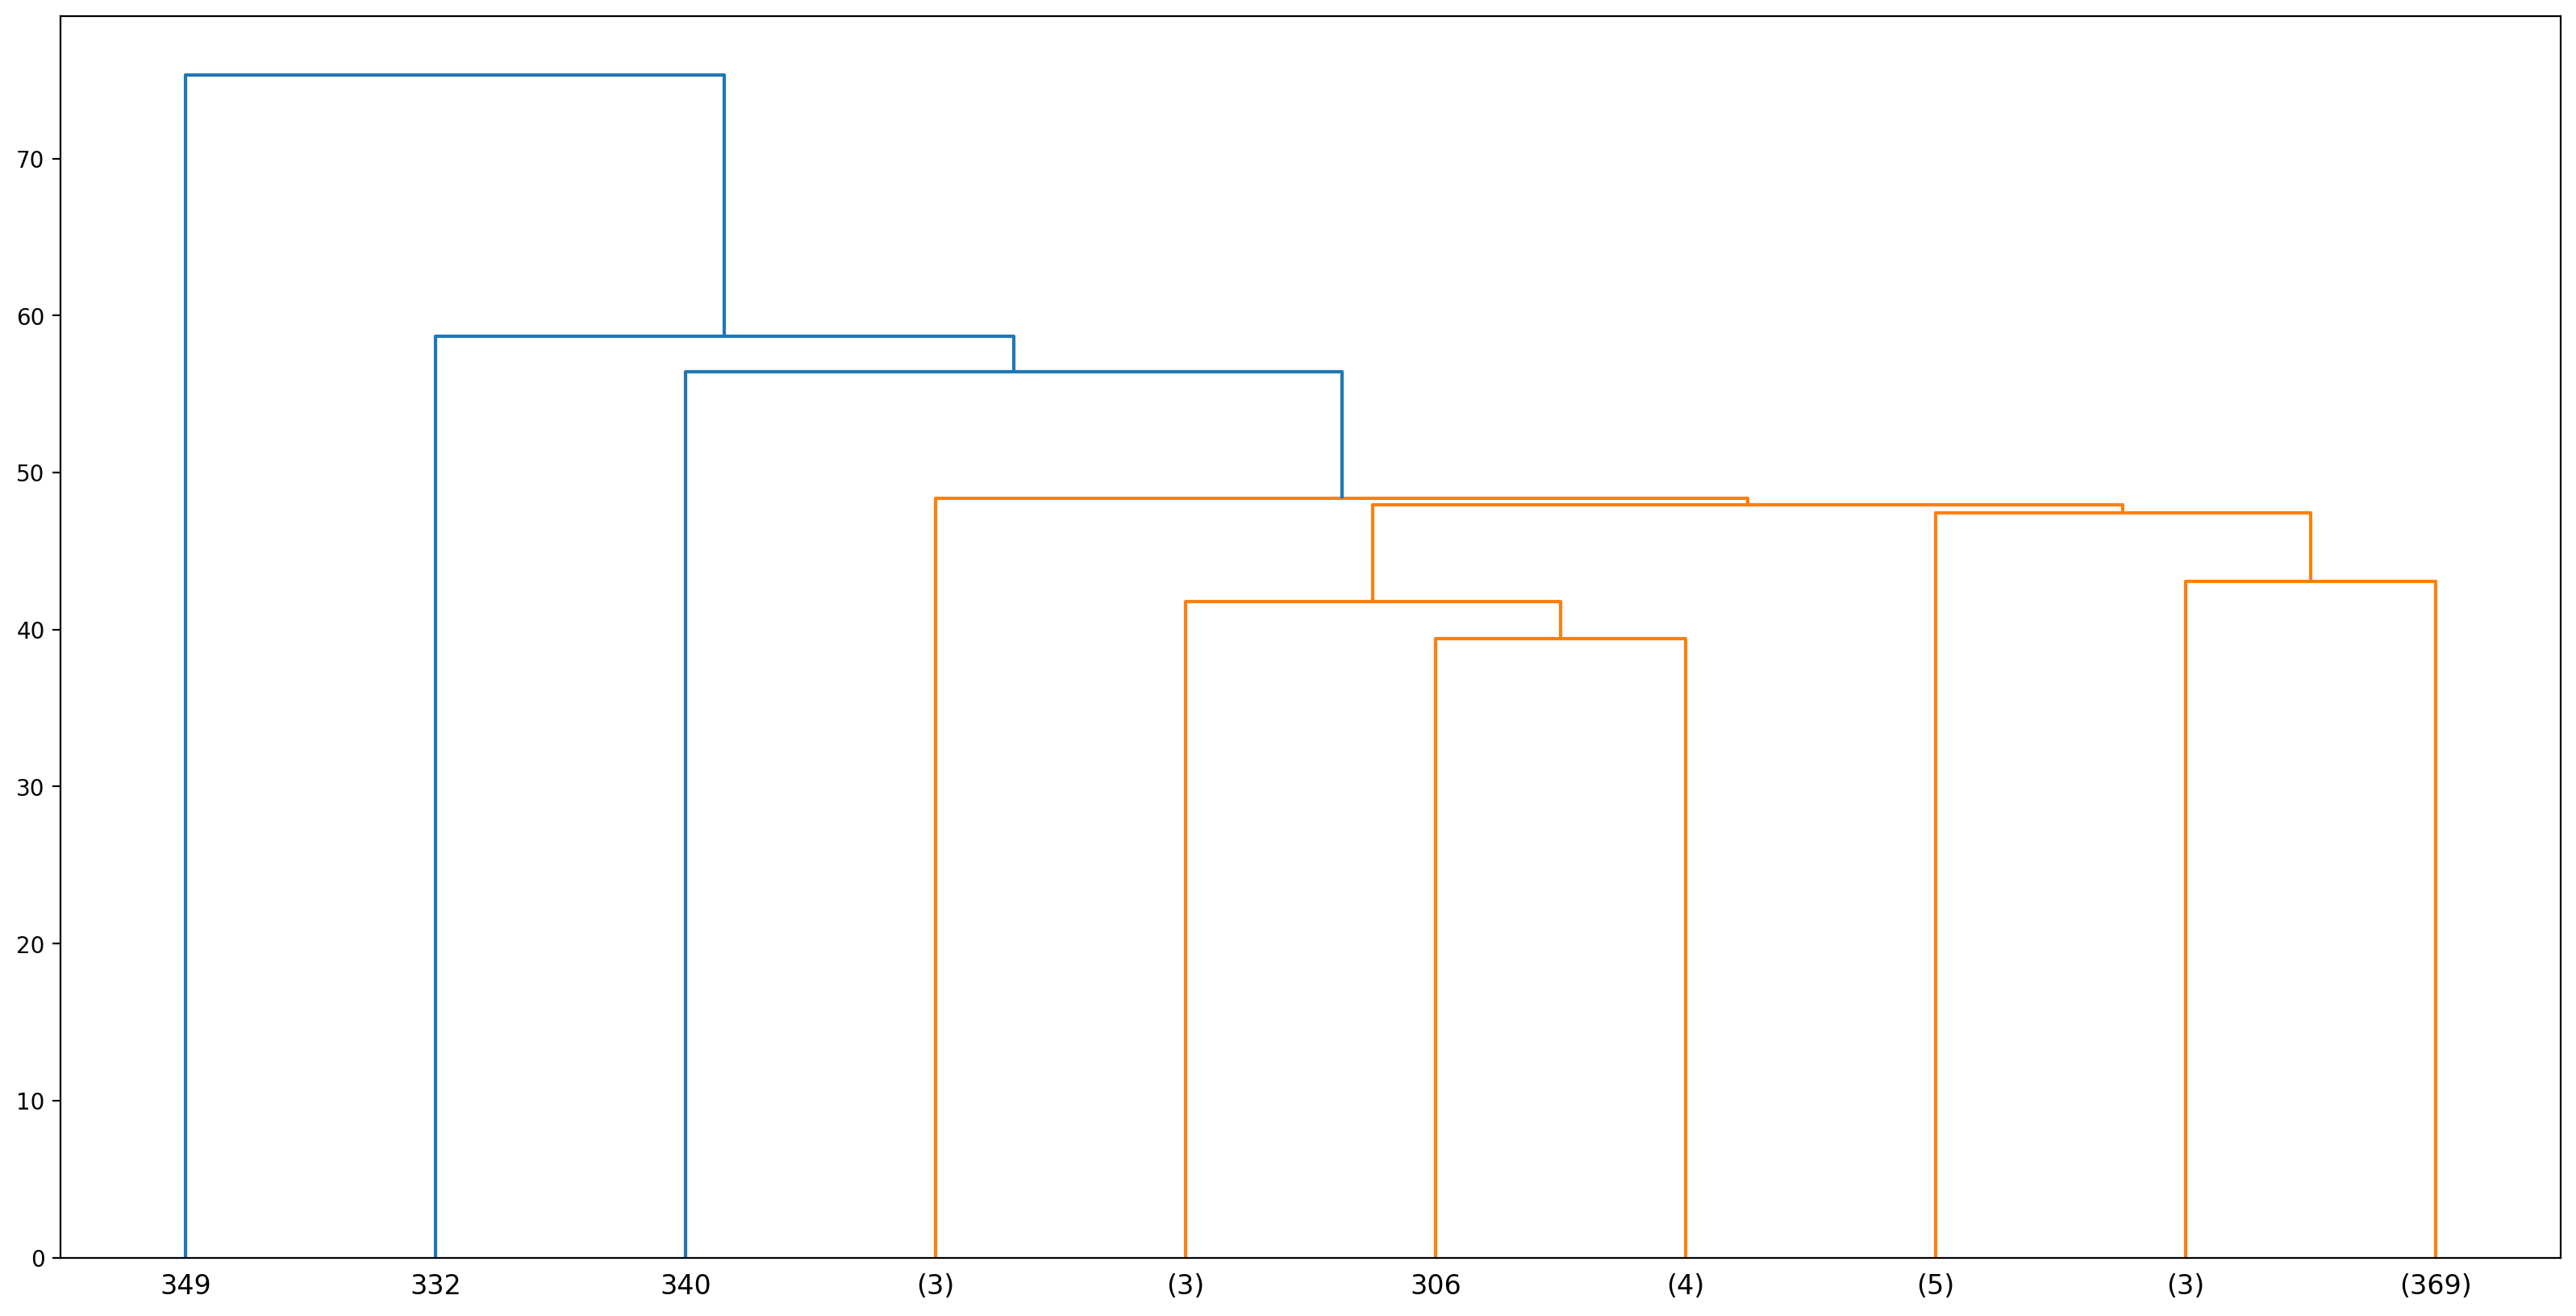

In [41]:
plt.figure(figsize=(20,10), dpi=200)

dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=10); # It returns 10 dendron

#### truncate_mode = 'level' & p=3 => 3 T-like connections

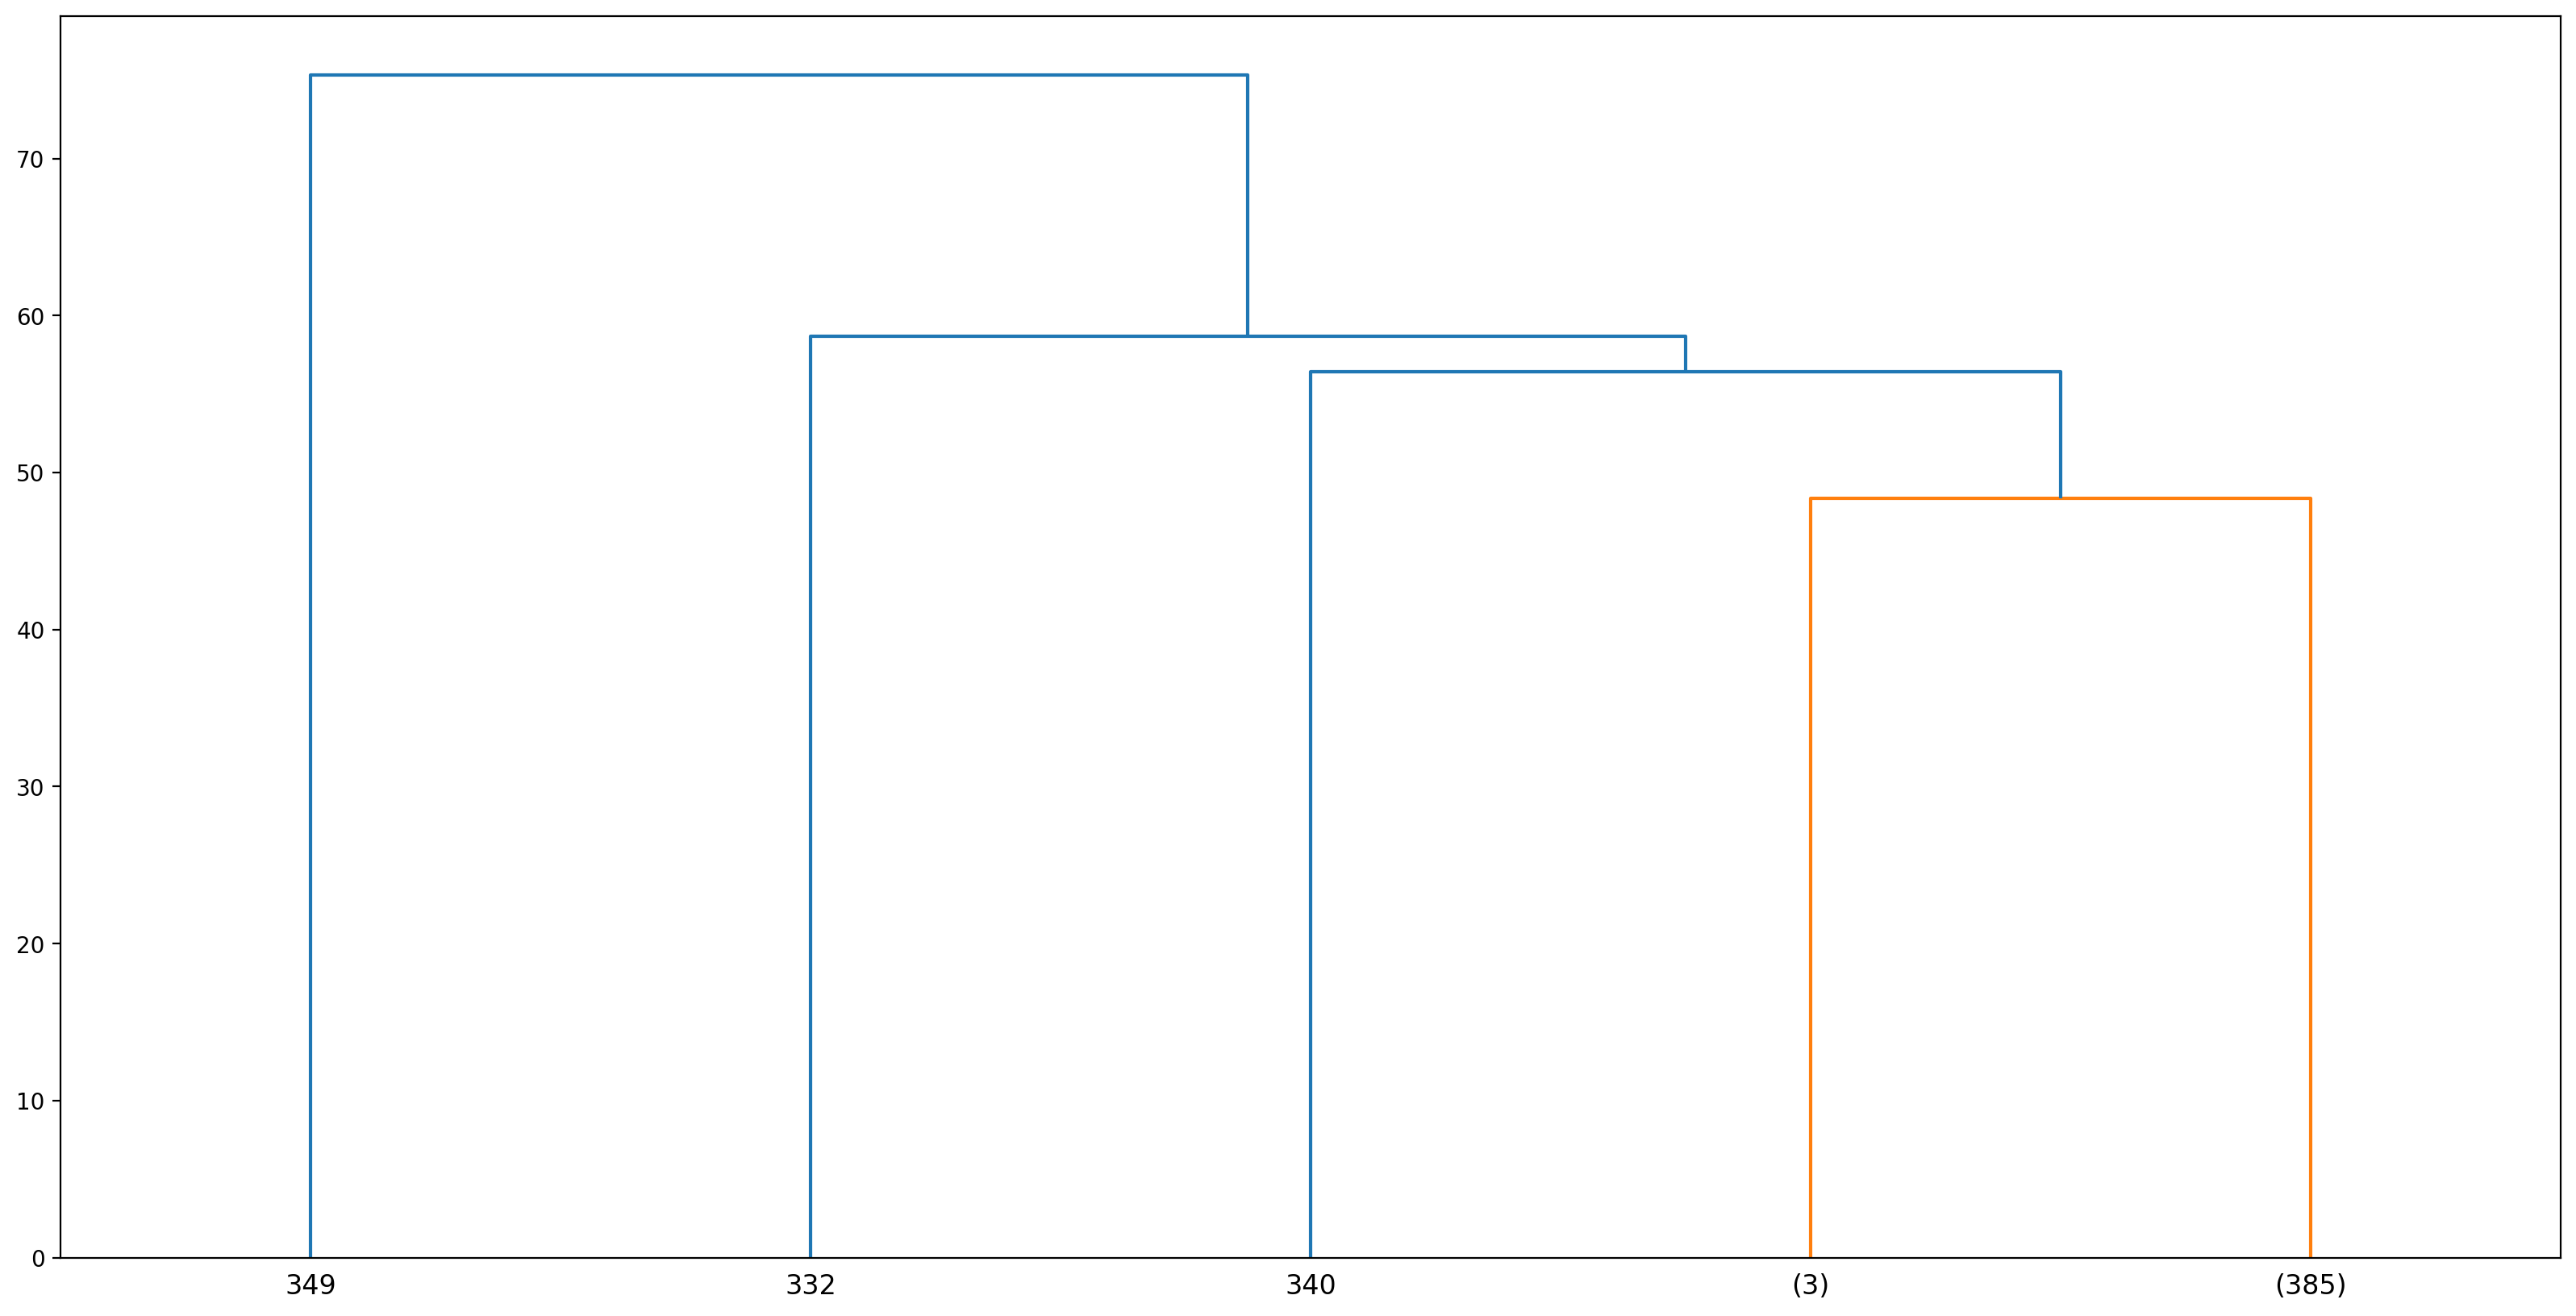

In [43]:
plt.figure(figsize=(20,10), dpi=200)

dendro = dendrogram(linkage_matrix, truncate_mode='level', p=3); # 3 levels == 3 T connections

# Choosing a Threshold Distance

#### **What is the distance between two points?**

In [46]:
df_scaled.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df_scaled['mpg'].idxmax()

320

In [49]:
df_scaled['mpg'].idxmin()

28

In [53]:
# https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
a = df_scaled.iloc[320]
b = df_scaled.iloc[28]
np.linalg.norm(a - b)

2.3852929970374714

#### Max possible distance?

Euclidean distance: https://en.wikipedia.org/wiki/Euclidean_distance

In [54]:
# As it is stated above: 
# the maximum distance between each 2 rows is:
np.sqrt( len(df_scaled.columns) )

3.1622776601683795

# Creating a Model Based on the Distance Threshold

     distance_threshold =
     The linkage distance threshold above which, clusters will not be merged.

In [57]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [58]:
labels = model.fit_predict(data_scaled)

In [59]:
labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

In [61]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# Linkage Matrix

Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

    A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [62]:
linkage_matrix = hierarchy.linkage(model.children_)

In [63]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

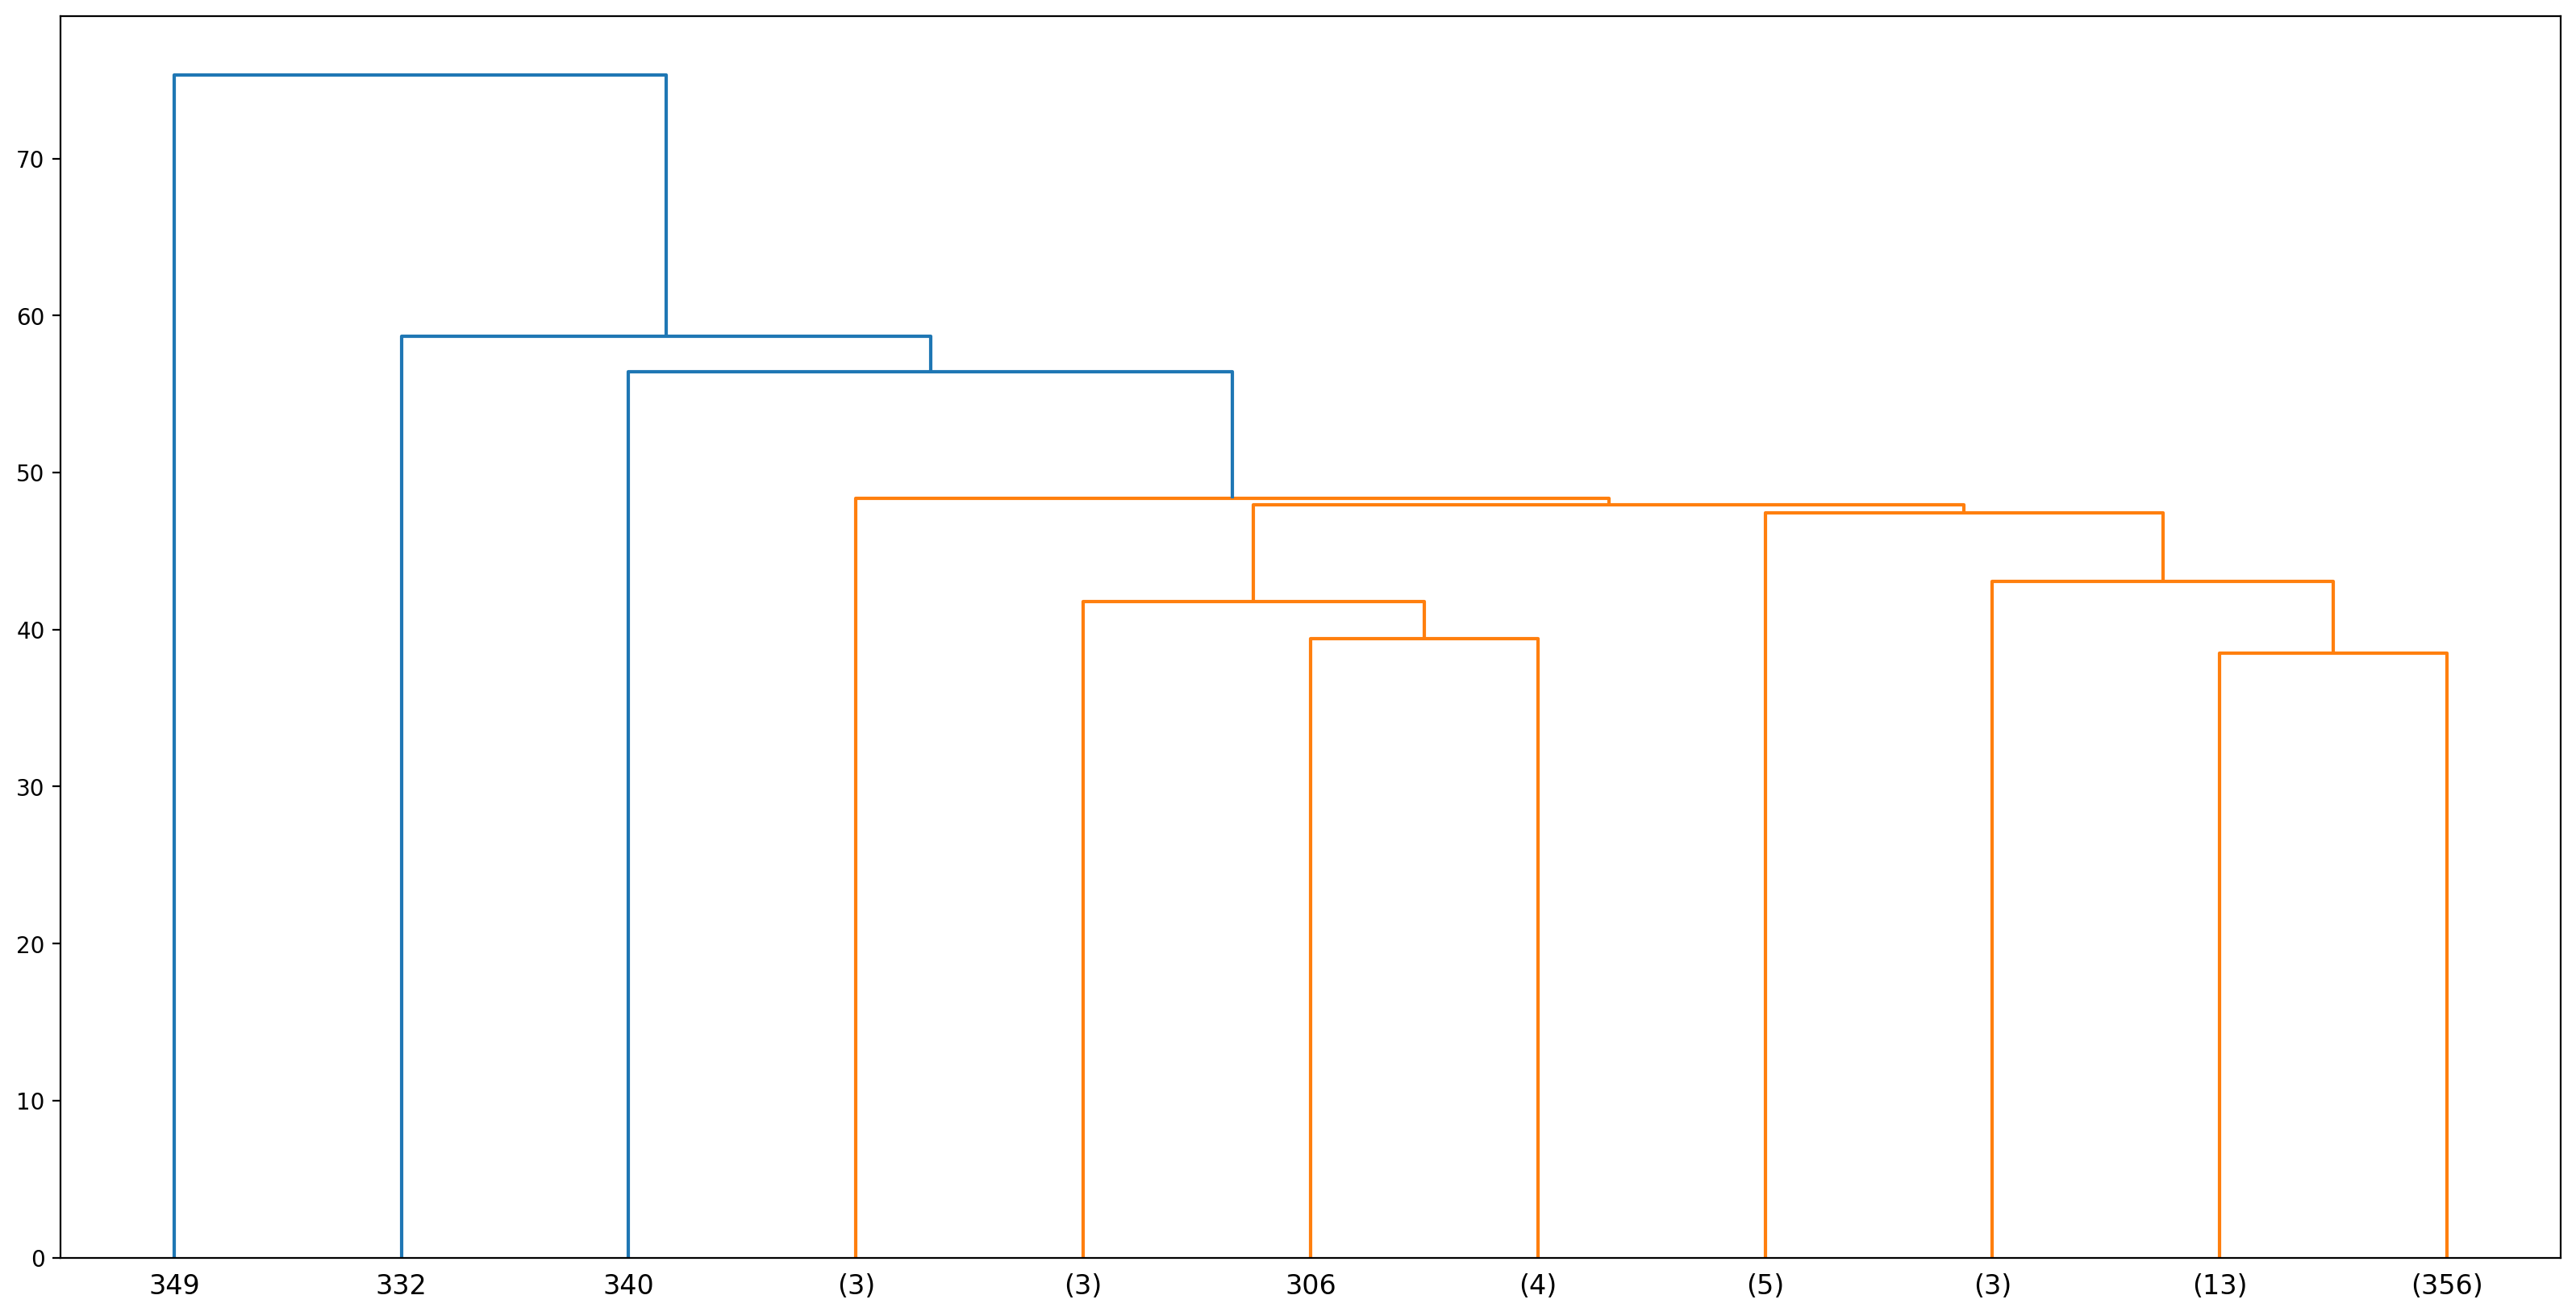

In [64]:
plt.figure(figsize=(20,10), dpi=200)

dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=11); # lastp = K (n_cluster)